# Startup South-west Intermediate Projects (Charts)

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
%matplotlib inline

In [2]:
import os
print (os.getcwd())

C:\Users\User\Downloads


In [3]:
xlsx = pd.ExcelFile('Nigerian Graduates Destination Survey (2013 -2017) (Responses) - nigerian graduates survey 2018.xlsx')

In [4]:
graduates_data = pd.read_excel(xlsx, 'Nigerian Graduates Destination ')

# Original shape  (rows and columns)
print(graduates_data.shape)

(5219, 36)


In [5]:
# Remove rows with missing
graduates_data = graduates_data.dropna()



### The Number of people employed and their year of graduation

In [6]:
gainfully_employed = graduates_data[(graduates_data['What best describes your current status?']=='Working full time (paid employment)') | (graduates_data['What best describes your current status?']=='Youth Corper (NYSC)') | (graduates_data['What best describes your current status?']=='Self-employed/freelance/entrepreneur')]

In [7]:

#f = lambda x: "%s" %x
#sns.boxplot(x='Year of graduation', y='What best describes your current status?', data=gainfully_employed[['Year of graduation', 'What best describes your current status?']])
#sns.distplot(gainfully_employed['Year of graduation'], kde=False, kde_kws={'alpha':1})
#sns.distplot(gainfully_employed.groupby(['Year of graduation', "What best describes your current status?"])['Year of graduation'], kde=False, kde_kws={'alpha':1})
#gainfully_employed.groupby(['Year of graduation', "What best describes your current status?"])

gainfully_employed.groupby(['Year of graduation', "What best describes your current status?"])['What best describes your current status?'].count()



Year of graduation  What best describes your current status?
2013                Self-employed/freelance/entrepreneur         31
                    Working full time (paid employment)         151
                    Youth Corper (NYSC)                           1
2014                Self-employed/freelance/entrepreneur         45
                    Working full time (paid employment)         164
                    Youth Corper (NYSC)                           1
2015                Self-employed/freelance/entrepreneur         43
                    Working full time (paid employment)         203
                    Youth Corper (NYSC)                           8
2016                Self-employed/freelance/entrepreneur         22
                    Working full time (paid employment)          57
                    Youth Corper (NYSC)                          77
2017                Self-employed/freelance/entrepreneur         10
                    Working full time (paid employment)

In [8]:
def make_plot(the_df, field, title, figsize, rotation=None, fontsize=None):
    sns.set_style('whitegrid')
    total = len(the_df[field])*1.
    plt.figure(figsize=figsize)
    ax = sns.countplot(x = field, data = the_df, palette = 'hls' )
    plt.title(title)
    #plt.ylabel('Frequency [%]')
    plt.ylabel('Frequency')
    
    if len(ax.patches)< 8:
        # Format 250 (60%)
        for p in ax.patches:
            ax.annotate('{} ({:.1f}%)'.format(p.get_height(), 100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
    else:
        # Format 60%
        for p in ax.patches:

            ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
        
    #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
    #ax.yaxis.set_ticks(np.linspace(0, total, 11))

    #adjust the ticklabel to the desired format, without changing the position of the ticks
    #_ = ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
    
    ax.set_xticklabels(ax.get_xticklabels(), rotation=rotation, ha="right", fontsize=fontsize)
    plt.tight_layout()
    plt.show()


### Can we get the number of people who are employed and the year of graduation


NB: There is no info on the year a graduate started his current job
2015    254
2014    210
2013    183
2016    156
2017    105
Name: Year of graduation, dtype: int64


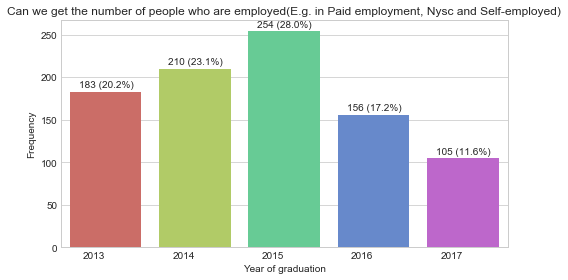

In [9]:
print("\nNB: There is no info on the year a graduate started his current job")

print(gainfully_employed['Year of graduation'].value_counts())

make_plot(the_df = gainfully_employed, field='Year of graduation', title="Can we get the number of people who are employed(E.g. in Paid employment, Nysc and Self-employed)", figsize=(8, 4))



In [10]:
def simplify_function(the_df, field, frq):

    indx = (the_df.groupby(field)[field].count()>9).index
    bool_value =the_df.groupby(field)[field].count()
    freq = the_df.groupby(field)[field].count().values.tolist()


    indx = list(np.where(bool_value<frq, False, indx))
    freq = np.where(bool_value<frq, False, freq)

    my = (list(indx))
    freqq = list(freq)
    #print(len(freq))

    courses = [same_course for same_course in list(my) if same_course!= False ]
    frequencies = [value for value in freqq if value != False]

    courses_list = [courses[i] for i, number in enumerate(list(frequencies)) for list(courses)[i] in range(number)]
    #print(len(courses_list))
    #print(sum(freq))
    #len(gainfully_employed[['Title of course studied']])
    #alone = np.where(make_titanic[['alone']]==True, 0, 1)

    #sns.countplot(x='Title of course studied', data = gainfully_employed['Title of course studied'].count()>9], palette='hls')
    #plt.show()


    d = {field: courses_list}
    mydf = pd.DataFrame(data=d)

    return mydf


### Which course of study has the highest level of employment

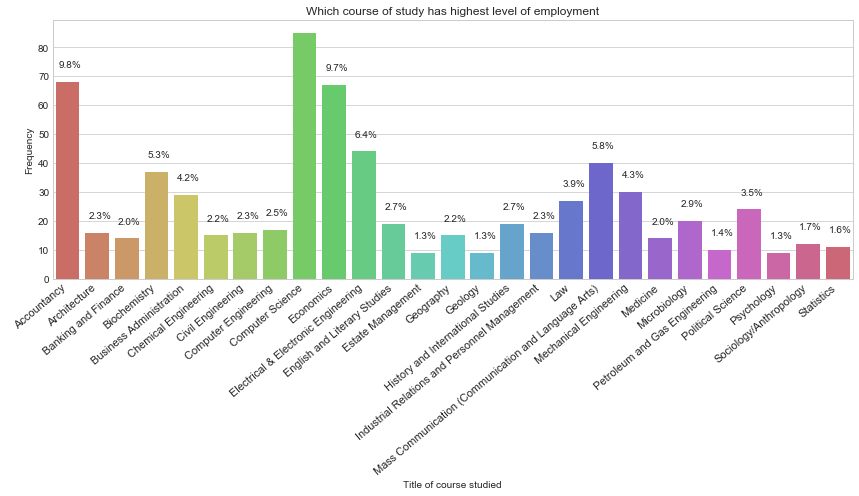

In [11]:


#print(len(gainfully_employed['Title of course studied'].value_counts()))

#most_occurring_courses = np.where(gainfully_employed.groupby('Title of course studied')['Title of course studied'].count()>9, False, gainfully_employed[['Title of course studied']])

#flattened = [x for same_courses in most_occurring_courses for x in same_courses if x != False]

#pprint(len(flattened))



mydf = simplify_function(gainfully_employed, 'Title of course studied', 9)
make_plot(the_df = mydf, field='Title of course studied', title="Which course of study has highest level of employment", figsize=(12, 7), rotation=40, fontsize=11)


#plt.figure(figsize=(12,6))
#ax = sns.countplot(x = 'Title of course studied', data = mydf, palette = 'hls' )

#ax.set_xticklabels(ax.get_xticklabels(), rotation=rotation, ha="right", fontsize=fontsize)
#plt.tight_layout()
#plt.show()


### Which university has produced the highest population of working people

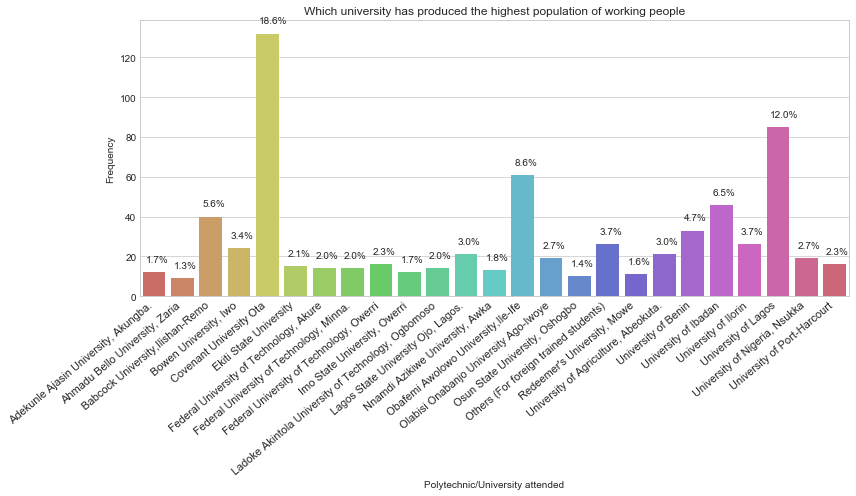

In [12]:
#gainfully_employed['Polytechnic/University attended'].value_counts()

mydf = simplify_function(gainfully_employed, 'Polytechnic/University attended', 9)
make_plot(the_df = mydf, field='Polytechnic/University attended', title="Which university has produced the highest population of working people", figsize=(12, 7), rotation=40, fontsize=11)

#plt.figure(figsize=(12,6))
#ax = sns.countplot(x = 'Polytechnic/University attended', data = mydf, palette = 'hls' )

#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=11)
#plt.tight_layout()
#plt.show()


### The percentage of the various degree that are working

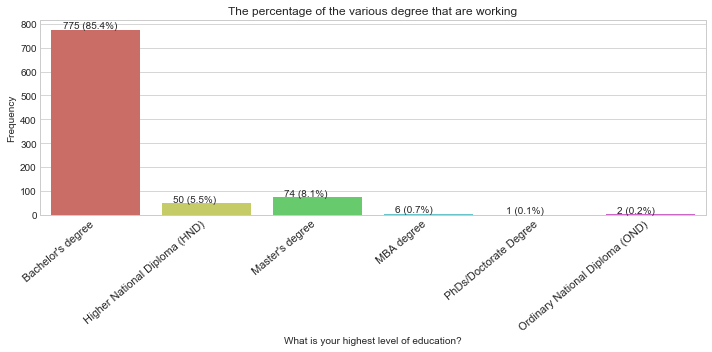

In [13]:
make_plot(the_df = gainfully_employed, field='What is your highest level of education?', title="The percentage of the various degree that are working", figsize=(10, 5), rotation=40, fontsize=11)

#plt.figure(figsize=(10,5))
#ax = sns.countplot(x = 'What is your highest level of education?', data = gainfully_employed, palette = 'hls' )

#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=11)
#plt.tight_layout()
#plt.show()

### Does nysc help people find a job?

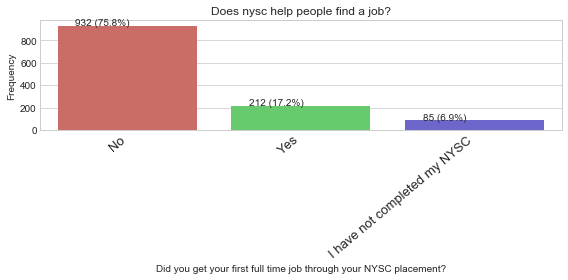

In [14]:
#graduates_data['Did you get your first full time job through your NYSC placement?']
make_plot(the_df = graduates_data, field='Did you get your first full time job through your NYSC placement?', title="Does nysc help people find a job?", figsize=(8, 4), rotation=40, fontsize=13)

#plt.figure(figsize=(8,4))
#ax = sns.countplot(x = 'Did you get your first full time job through your NYSC placement?', data = graduates_data, palette = 'hls' )

#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=13)
#plt.tight_layout()
#plt.show()

### Sector that employs people more

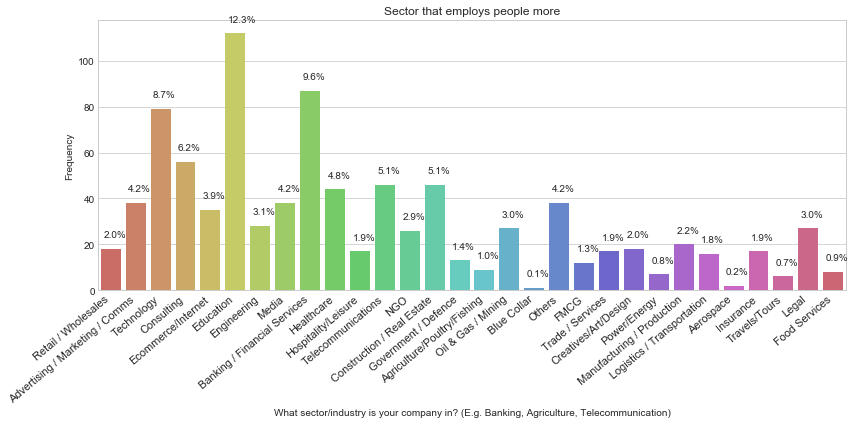

In [15]:
#'What sector/industry is your company in? (E.g. Banking, Agriculture, Telecommunication)'
make_plot(the_df = gainfully_employed, field='What sector/industry is your company in? (E.g. Banking, Agriculture, Telecommunication)', title="Sector that employs people more", figsize=(12, 6), rotation=40, fontsize=11)

#plt.figure(figsize=(12,6))
#ax = sns.countplot(x = 'What sector/industry is your company in? (E.g. Banking, Agriculture, Telecommunication)', data = graduates_data, palette = 'hls' )

#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=11)
#plt.tight_layout()
#plt.show()

### Did you need your higher education qualification to get your first job?

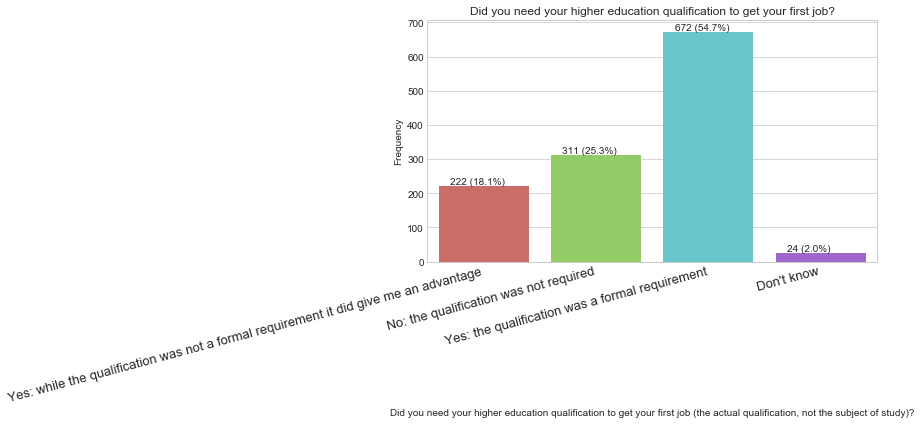

In [16]:
make_plot(the_df = graduates_data, field='Did you need your higher education qualification to get your first job (the actual qualification, not the subject of study)?', title="Did you need your higher education qualification to get your first job?", figsize=(12, 6), rotation=15, fontsize=13)

#plt.figure(figsize=(12,6))
#ax = sns.countplot(x = 'Did you need your higher education qualification to get your first job (the actual qualification, not the subject of study)?', data = graduates_data, palette = 'hls' )

#ax.set_xticklabels(ax.get_xticklabels(), rotation=15, ha="right", fontsize=13)
#plt.tight_layout()
#plt.show()

### What was the most significant reason for deciding to take this job?

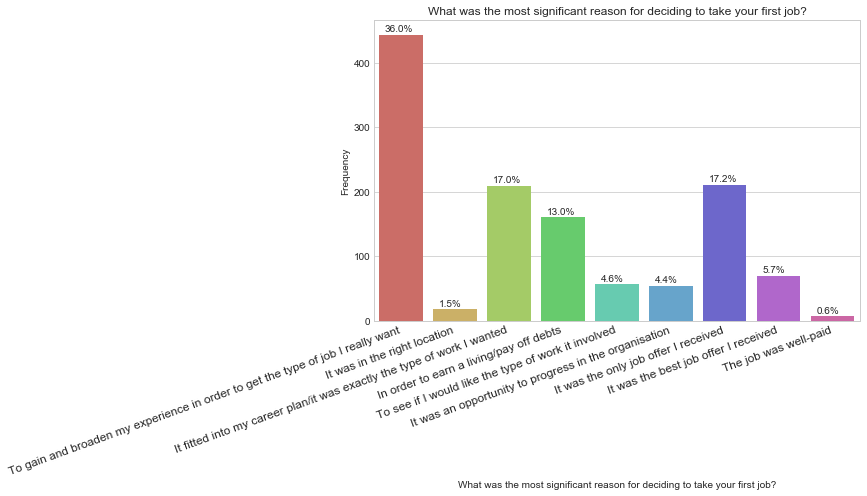

In [17]:
make_plot(the_df = graduates_data, field='What was the most significant reason for deciding to take your first job?', title="What was the most significant reason for deciding to take your first job?", figsize=(12, 7), rotation=20, fontsize=12)

#plt.figure(figsize=(12,7))
#ax = sns.countplot(x = 'What was the most significant reason for deciding to take your first job?', data = graduates_data, palette = 'hls' )

#ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right", fontsize=12)
#plt.tight_layout()
#plt.show()

### What is your current monthly income level?



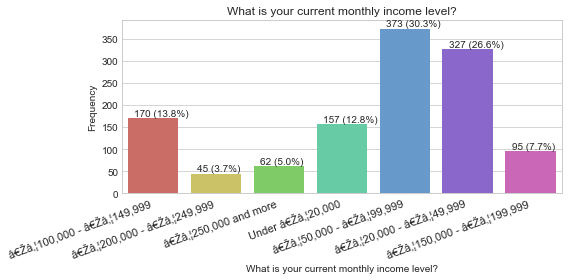

In [18]:
make_plot(the_df = graduates_data, field='What is your current monthly income level?', title="What is your current monthly income level?", figsize=(8, 4), rotation=20, fontsize=11)

#plt.figure(figsize=(8,4))
#ax = sns.countplot(x = 'What is your current monthly income level?', data = graduates_data, palette = 'hls' )

#ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right", fontsize=11)
#plt.tight_layout()
#plt.show()

### How many people are working in their preferred sector?

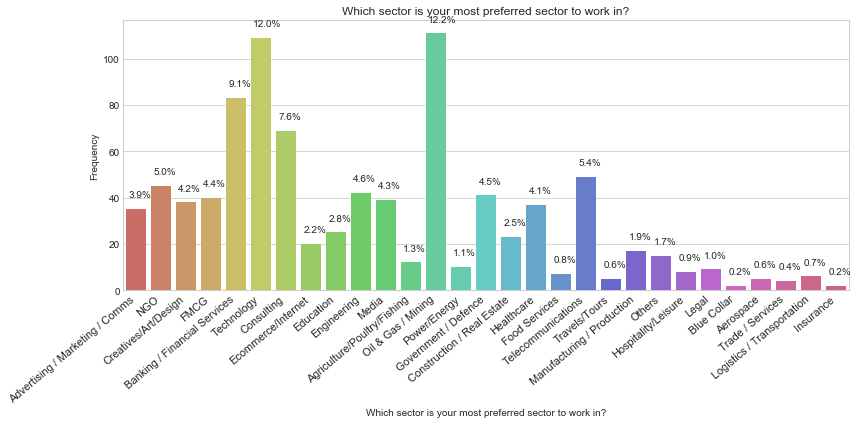

In [19]:
make_plot(the_df = gainfully_employed, field='Which sector is your most preferred sector to work in?', title="Which sector is your most preferred sector to work in?", figsize=(12, 6), rotation=40, fontsize=11)

#plt.figure(figsize=(12,6))
#ax = sns.countplot(x = 'Which sector is your most preferred sector to work in?', data = gainfully_employed, palette = 'hls' )

#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=11)
#plt.tight_layout()
#plt.show()

### What best describe your current status?

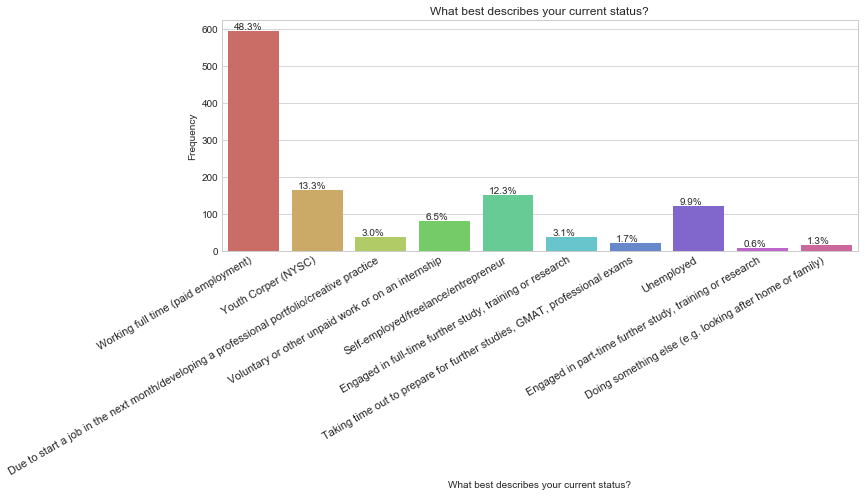

In [20]:
make_plot(the_df = graduates_data, field='What best describes your current status?', title="What best describes your current status?", figsize=(12,7), rotation=30, fontsize=11)

#plt.figure(figsize=(12,6))
#ax = sns.countplot(x = 'What best describes your current status?', data = graduates_data, palette = 'hls' )

#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=11)
#plt.tight_layout()
#plt.show()


### As far as you are aware, what was most important to your current employer about your qualification?

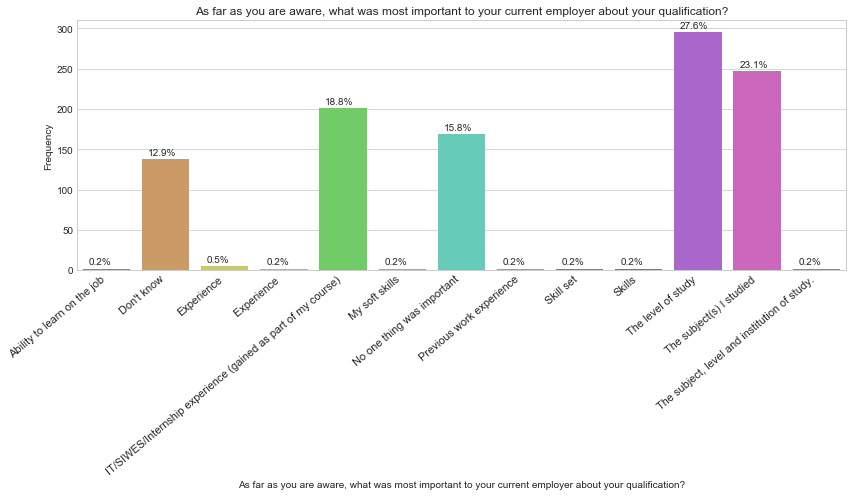

In [21]:

mydf = simplify_function(graduates_data, 'As far as you are aware, what was most important to your current employer about your qualification?', 2)
make_plot(the_df = mydf, field='As far as you are aware, what was most important to your current employer about your qualification?', title="As far as you are aware, what was most important to your current employer about your qualification?", figsize=(12,7), rotation=40, fontsize=11)

#plt.figure(figsize=(12,7))
#ax = sns.countplot(x = 'As far as you are aware, what was most important to your current employer about your qualification?', data = mydf, palette = 'hls' )

#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=11)
#plt.tight_layout()
#plt.show()

### Were you able to rent an apartment or buy a car from the salary you got from your first job?

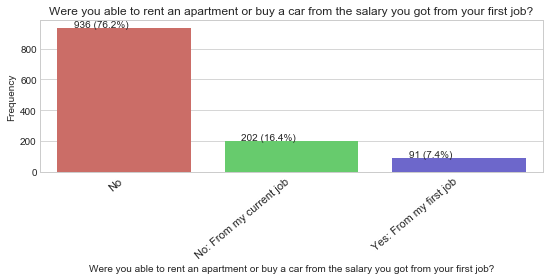

In [22]:
make_plot(the_df = graduates_data, field='Were you able to rent an apartment or buy a car from the salary you got from your first job?', title="Were you able to rent an apartment or buy a car from the salary you got from your first job?", figsize=(8,4), rotation=40, fontsize=11)

#plt.figure(figsize=(8,4))
#ax = sns.countplot(x = 'Were you able to rent an apartment or buy a car from the salary you got from your first job?', data = graduates_data, palette = 'hls' )

#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=11)
#plt.tight_layout()
#plt.show()